Decision Tree Classifier:
Accuracy: 0.73
Precision: 0.7124855576951563
Recall: 0.73
F1 Score: 0.7160718515594158
ROC AUC: 0.6360139439836519

Confusion Matrix:
[[122  19]
 [ 35  24]]

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.87      0.82       141
           2       0.56      0.41      0.47        59

    accuracy                           0.73       200
   macro avg       0.67      0.64      0.64       200
weighted avg       0.71      0.73      0.72       200



k-NN Classifier:
Accuracy: 0.685
Precision: 0.6452232142857142
Recall: 0.685
F1 Score: 0.6520313666915608
ROC AUC: 0.5607645149657411

Confusion Matrix:
[[123  18]
 [ 45  14]]

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.87      0.80       141
           2       0.44      0.24      0.31        59

    accuracy                           0.69       200
   macro avg       0.58      0.55      0.55   

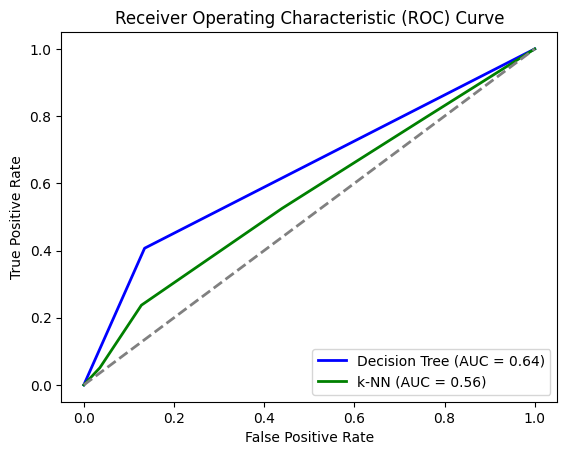

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/sample_data/CreditDataset.csv'
data = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
# Encode categorical features to numerical values
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

# Select feature columns and target column
X = data.drop(columns=['Class'])
y = data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
# Fit the model on the training data
dt_model.fit(X_train, y_train)
# Predict on the test set
y_pred_dt = dt_model.predict(X_test)
# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
# For AUC, we need probability estimates
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_dt, multi_class='ovr')

# k-NN Classifier
# Initialize the k-NN model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
# Fit the model on the training data
knn_model.fit(X_train, y_train)
# Predict on the test set
y_pred_knn = knn_model.predict(X_test)
# Calculate evaluation metrics for k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
# For AUC, we need probability estimates
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_prob_knn, multi_class='ovr')

# Print evaluation metrics for both models
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")
print(f"ROC AUC: {roc_auc_dt}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\n\nk-NN Classifier:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")
print(f"ROC AUC: {roc_auc_knn}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=dt_model.classes_[1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# ROC Curve for k-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn, pos_label=knn_model.classes_[1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'k-NN (AUC = {roc_auc_knn:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()